In [1]:
%matplotlib notebook
import os
import numpy as np
import chaospy as cp
import pandas as pd
import seaborn as sns
import itertools
import pickle
from numpy import linalg as LA
from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm,SymLogNorm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)
pltlinestyles = [ (0, (1, 5)),(0, (3, 5, 1, 5)),(0, (5, 5)),(0, ()), (0, (3, 1, 1, 1, 1, 1)), 
        (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 10, 1, 10, 1, 10)),(0, (1, 10)), 
        (0, (5, 1)),  (0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),  (0, (1, 1))  ]*10

pltmarkers =['o','v','s','d','+','*']
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
figsize = (4*1.5,3*1.5)
pf = 1e-4

In [12]:
MODEL_NAME      = 'Bench1'
DATA_DIR        = '/Users/jinsongliu/External/MUSE_UQ_DATA'
# DATA_DIR        = 'G:\My Drive\MUSE_UQ_DATA'

MODEL_DIR_DATA  = os.path.join(DATA_DIR,MODEL_NAME,r'Data')
MODEL_DIR_FIGURE= os.path.join(os.getcwd(),r'Figures')
print(MODEL_DIR_FIGURE)

# class Ecdf2plot: 
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

/Users/jinsongliu/BoxSync/MUSELab/museuq/examples/bench1/Figures


##  Periodic function

\begin{equation}
\begin{aligned}
    f(x) &= x \sin(x) + \epsilon \\
    \epsilon \sim p(\epsilon), \mathbb{E}[\epsilon] &= 0, \mathrm{Var}[\epsilon] = \frac{1}{5}|f(x)|
\end{aligned}
\end{equation}

In [3]:
figsize = (4*1.5,3*1.5)
pf = 1e-4
noise_type = 'DATA_NOISE_FREE'
# x_fix = np.linspace(-5,15,1000)[np.newaxis, :]
# metamodel_class, metamodel_basis= ['PCE', [8,9,10]]
ndoe2plot = list(np.arange(10,16))

In [4]:
dist_x = cp.Normal(5,2)
print(dist_x.inv(pf/100),dist_x.inv(1-pf/100))

-4.506848617645797 14.506848617634175


(3, 1000)
(1000,) (1000,)


<IPython.core.display.Javascript object>


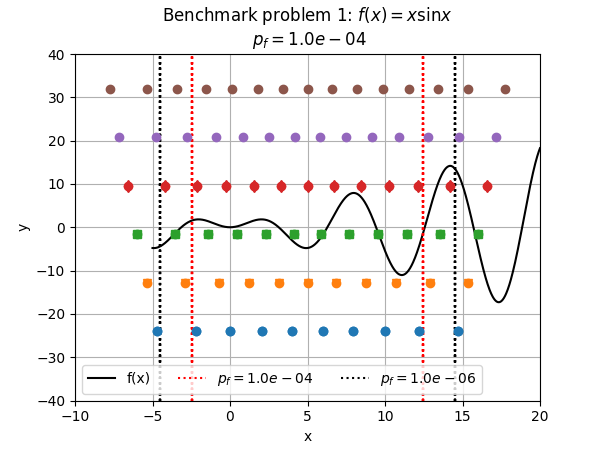

3
x_train shape  :(10,)
x_weight shape :(10,)
y_train shape  :(10,)
zeta_train shape:(10,)
3
x_train shape  :(11,)
x_weight shape :(11,)
y_train shape  :(11,)
zeta_train shape:(11,)
3
x_train shape  :(12,)
x_weight shape :(12,)
y_train shape  :(12,)
zeta_train shape:(12,)
3
x_train shape  :(13,)
x_weight shape :(13,)
y_train shape  :(13,)
zeta_train shape:(13,)
3
x_train shape  :(14,)
x_weight shape :(14,)
y_train shape  :(14,)
zeta_train shape:(14,)
3
x_train shape  :(15,)
x_weight shape :(15,)
y_train shape  :(15,)
zeta_train shape:(15,)


In [5]:
metamodel_class, metamodel_basis= ['PCE', ndoe2plot]
xlims, ylims = [-10,20], [-40,40] 
yDoE = np.linspace(ylims[0]*0.6,ylims[1]*0.8,len(ndoe2plot))
label_added =False

data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_noise_free.npy'))
print(data_set.shape)
x,y_mean = data_set[0],data_set[1]
print(x.shape, y_mean.shape)

fig1= plt.figure(figsize=figsize)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,y_mean,'k',label=r'f(x)')

# data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_normal.npy'))
# print(data_set.shape)
# x_samples,y_samples = data_set[0],data_set[1]
# std = data_set[4]

# ax1.plot(x_samples,y_samples,'-k',label=r'$f(x)+\epsilon$',alpha=0.5,linewidth=0.5)
# ax1.fill_between(x, y_mean + 1.96*std, y_mean - 1.96*std, color='k',alpha=0.2,edgecolor='None',label='95% CI')
for i, idoe2plot in enumerate(ndoe2plot):

    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Train_noise_free_Quadrature_DoE{}.npy'.format(idoe2plot)))
    print(len(data_set))
    x_train    = np.squeeze(data_set[0][0])
    x_weight   = np.squeeze(data_set[0][1])
    y_train    = np.squeeze(data_set[1])
    zeta_train = np.squeeze(data_set[2][0])


    print('{:<15}:{}'.format('x_train shape'   , x_train.shape))
    print('{:<15}:{}'.format('x_weight shape'  , x_weight.shape))
    print('{:<15}:{}'.format('y_train shape'   , y_train.shape))
    print('{:<15}:{}'.format('zeta_train shape', zeta_train.shape))
    # print('{:<15}:{}'.format('error std  shape', error_std.shape))
    # print('y_validate shape:{}'.format(y_validate.shape))
    # print('x_test shape:{}'.format(x_test.shape))
    # print('y_test shape:{}'.format(y_test.shape))

    ax1.plot(x_train, np.ones(x_train.shape)*yDoE[i],linestyle='',
             marker=pltmarkers[i],color=pltcolors[i],
             zorder=9)
#     , label=r'DoE: {}'.format(idoe2plot)
    ax1.set_ylim(ylims[0],ylims[1])
    ax1.set_xlim(xlims[0],xlims[1])
    if label_added:
        ax1.plot([dist_x.inv(pf), dist_x.inv(pf)],ax1.get_ylim(),':r',markersize=1)
        ax1.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax1.get_ylim(),':r',markersize=1)
        ax1.plot([dist_x.inv(pf/100), dist_x.inv(pf/100)],ax1.get_ylim(),':k',markersize=1)
        ax1.plot([dist_x.inv(1-pf/100), dist_x.inv(1-pf/100)],ax1.get_ylim(),':k',markersize=1)
    else:
        ax1.plot([dist_x.inv(pf), dist_x.inv(pf)],ax1.get_ylim(),':r',markersize=1,label=r'$p_f = {:.1e}$'.format(pf))
        ax1.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax1.get_ylim(),':r',markersize=1)
        ax1.plot([dist_x.inv(pf/100), dist_x.inv(pf/100)],ax1.get_ylim(),':k',markersize=1,label=r'$p_f = {:.1e}$'.format(pf/100))
        ax1.plot([dist_x.inv(1-pf/100), dist_x.inv(1-pf/100)],ax1.get_ylim(),':k',markersize=1)
        label_added = True
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    # ax1.set_title(r'{} surrogate model: {}'.format(metamodel_class,MODEL_NAME))
    ax1.set_title('Benchmark problem 1: $f(x)=x\sin x$ \n $p_f={:.1e}$'.format(pf))
    ax1.legend(loc=3,ncol=3)
    ax1.grid(True)
    fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'Quadrature_DoE{}.pdf'.format(idoe2plot)))

<IPython.core.display.Javascript object>


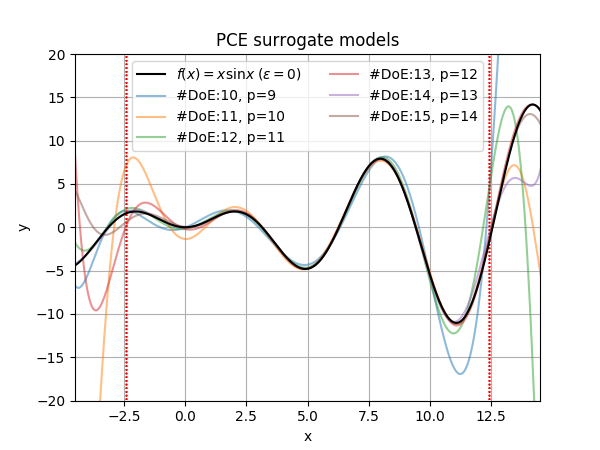

8
x_train shape:(10,)
x_weight shape:(10,)
y_train shape:(10,)
y_validate shape:(10,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(11,)
x_weight shape:(11,)
y_train shape:(11,)
y_validate shape:(11,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(12,)
x_weight shape:(12,)
y_train shape:(12,)
y_validate shape:(12,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(13,)
x_weight shape:(13,)
y_train shape:(13,)
y_validate shape:(13,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(14,)
x_weight shape:(14,)
y_train shape:(14,)
y_validate shape:(14,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(15,)
x_weight shape:(15,)
y_train shape:(15,)
y_validate shape:(15,)
x_test shape:(1000,)
y_test shape:(1000,)


In [22]:
metamodel_class, metamodel_basis= ['PCE', list(np.arange(10,16))]
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_noise_free.npy'))
x,y_mean = data_set[0],data_set[1]
    
fig1 = plt.figure(figsize=figsize)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,y_mean,'k',label=r'$f(x) = x\sin x \;(\epsilon=0)$',zorder=9)
# print(data_set[0].shape, data_set[1].shape)
for i, idoe2plot in enumerate(ndoe2plot):

    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_train_validation_test_Quadrature_DoE{}.npy'.format(idoe2plot)))
    print(len(data_set))
    x_train    = np.squeeze(data_set[0])
    x_weight   = np.squeeze(data_set[1])
    y_train    = np.squeeze(data_set[2])
    zeta_train = np.squeeze(data_set[3])
    y_validate = np.squeeze(data_set[4])
    x_test     = np.squeeze(data_set[5])
    y_test     = np.squeeze(data_set[7])
    print('x_train shape:{}'.format(x_train.shape))
    print('x_weight shape:{}'.format(x_weight.shape))
    print('y_train shape:{}'.format(y_train.shape))
    print('y_validate shape:{}'.format(y_validate.shape))
    print('x_test shape:{}'.format(x_test.shape))
    print('y_test shape:{}'.format(y_test.shape))

#     ax1.plot(x_train,y_train,'x',color=pltcolors[i],
#              zorder=9, label=r'Training Data')

#     for i, imetamodel_basis in enumerate(metamodel_basis[:2]):
#         ax1.plot(x_train,y_validate[i,:],'o',
#                  markeredgecolor=pltcolors[i], markerfacecolor='w',
#                  label=r'$PCE: p={:d}$'.format(imetamodel_basis))
#         ax1.plot(x_test,y_test[i,:],'-',color=pltcolors[i],alpha=0.4)
    
#     ax1.plot(x_train,y_validate,'o',
#              markeredgecolor=pltcolors[i], markerfacecolor='w',
#              label=r'$PCE: p={:d}$'.format(idoe2plot))
    ax1.plot(x_test,y_test,'-',color=pltcolors[i],alpha=0.5,label=r'#DoE:{:d}, p={:d}'.format(idoe2plot,idoe2plot-1))
    ax1.set_ylim(-50,50)
    ax1.set_xlim(-5,20)
    ax1.plot([dist_x.inv(pf), dist_x.inv(pf)],ax1.get_ylim(),':r',linewidth=1)
    ax1.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax1.get_ylim(),':r',linewidth=1)
#     ax1.set_xlim()
#     ax1.set_ylim(-20,20)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(u'PCE surrogate models'.format(metamodel_class,MODEL_NAME))
    # ax1.legend(loc=8,fontsize=10,ncol=3)
    icol = i//3+1
    ax1.legend(fontsize=10,ncol=icol,loc=2)
    ax1.grid(True)
    fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}.pdf'.format(metamodel_class,idoe2plot)))
#     fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}.png'.format(metamodel_class,idoe2plot)),facecolor='w')


In [23]:
ax1.set_xlim(dist_x.inv(pf/100), dist_x.inv(1-pf/100))
ax1.set_ylim(-20,20)
ax1.legend(fontsize=10,ncol=2)
fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}_zoomin.pdf'.format(metamodel_class,idoe2plot)))

<IPython.core.display.Javascript object>


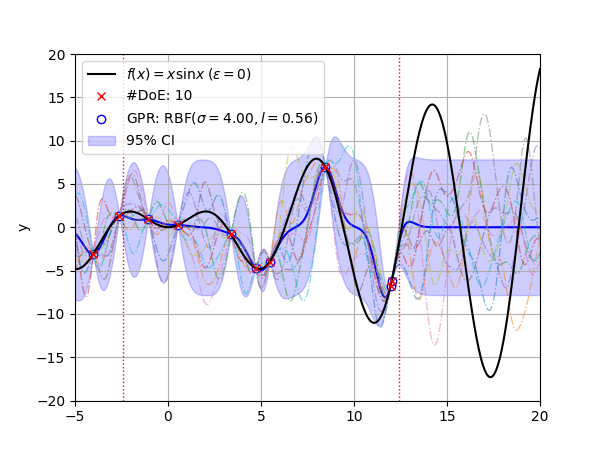

7
x_train shape:(10,)
y_train shape:(10,)
y_validate shape:(10,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


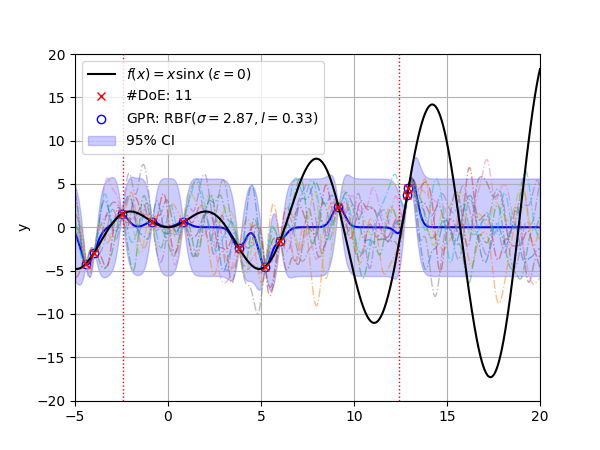

7
x_train shape:(11,)
y_train shape:(11,)
y_validate shape:(11,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


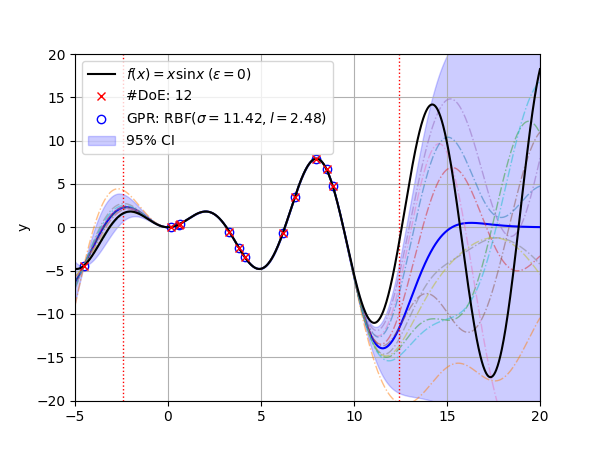

7
x_train shape:(12,)
y_train shape:(12,)
y_validate shape:(12,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


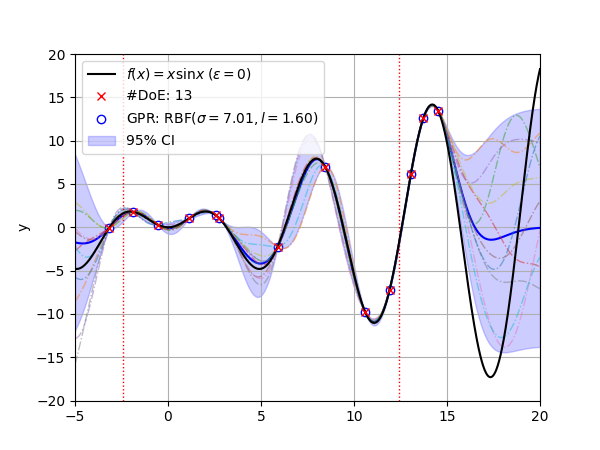

7
x_train shape:(13,)
y_train shape:(13,)
y_validate shape:(13,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


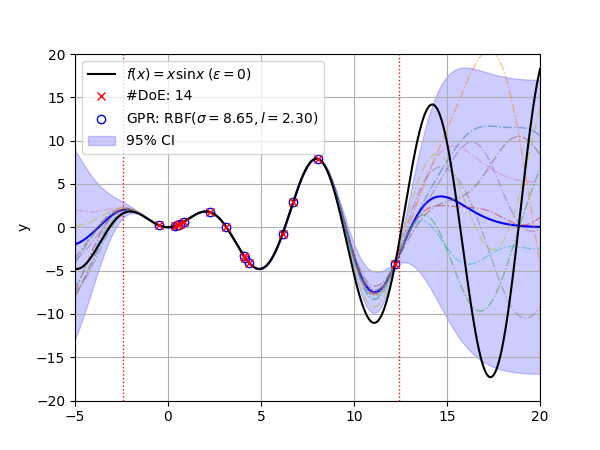

7
x_train shape:(14,)
y_train shape:(14,)
y_validate shape:(14,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


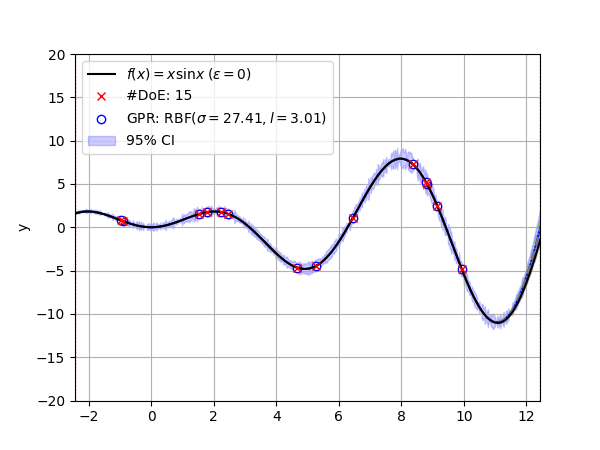

7
x_train shape:(15,)
y_train shape:(15,)
y_validate shape:(15,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


In [30]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_noise_free.npy'))
x,y_mean = data_set[0],data_set[1]

# print(data_set[0].shape, data_set[1].shape)


for i, idoe2plot in enumerate(ndoe2plot):
    fig3 = plt.figure(figsize=figsize)
    ax3 = fig3.add_subplot(1,1,1)
    ax3.plot(x,y_mean,'k',label=r'$f(x) = x\sin x \;(\epsilon=0)$',zorder=9)    
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}.npy'.format(idoe2plot)))
    print(len(data_set))
    x_train    = np.squeeze(data_set[0])
    y_train    = np.squeeze(data_set[1])
    zeta_train = np.squeeze(data_set[2])
    y_validate = np.squeeze(data_set[3][0,:])
    y_valid_std= np.squeeze(data_set[3][1,:])
    x_test     = np.squeeze(data_set[4])
    y_test_mean= np.squeeze(data_set[6][0,:])
    y_test_std = np.squeeze(data_set[6][1,:])
    print('x_train shape:{}'.format(x_train.shape))
    # print('x_weight shape:{}'.format(x_weight.shape))
    print('y_train shape:{}'.format(y_train.shape))
    print('y_validate shape:{}'.format(y_validate.shape))
    print('x_test shape:{}'.format(x_test.shape))
    print('y_test_mean shape:{}'.format(y_test_mean.shape))
    print('y_test_std shape:{}'.format(y_test_std.shape))
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_params.npy'.format(idoe2plot)))
    opt_theta = np.exp(data_set[0]['opt_theta'])
    
    
    ax3.plot(x_train,y_train,'rx',zorder=9, label=r'#DoE: {}'.format(idoe2plot))
    ax3.plot(x_train,y_validate,'o', markeredgecolor='b', markerfacecolor='w', label=r'GPR: RBF$(\sigma={:.2f},l={:.2f})$'.format(opt_theta[0]**0.5, opt_theta[1]))

    ax3.plot(x_test,y_test_mean,'-', color='b')
    ax3.fill_between(x_test, y_test_mean - 1.96*y_test_std, y_test_mean + 1.96*y_test_std,
                     color='b',alpha=0.2,edgecolor='None',label='95% CI')

    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_sample_y.npy'.format(idoe2plot))) 
#     print(len(data_set))
    for i in range(1, len(data_set)):
        ax3.plot(data_set[0],data_set[i],'-.',linewidth=1,alpha=0.5)

    ax3.set_ylim(-20,20)
    ax3.legend(loc=8,fontsize=10,ncol=3)
    ax3.plot([dist_x.inv(pf), dist_x.inv(pf)],ax3.get_ylim(),':r',linewidth=1)
    ax3.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax3.get_ylim(),':r',linewidth=1)
    # ax3.set_ylim(-50,50)
    ax3.set_xlim(-5,20)
    ax3.set_ylabel('y')
#     ax3.set_title(u'Benchmark problem 1:  $f(x) = x\sin x \;(\epsilon=0)$'.format(metamodel_class,MODEL_NAME))
    # ax3.legend(loc=8,fontsize=10,ncol=3)
    ax3.legend(fontsize=10,loc=2)
    ax3.grid()
    fig3.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Uniform_DoE{}.pdf'.format(metamodel_class,idoe2plot)))
    plt.show()




In [31]:
ax3.set_xlim(dist_x.inv(pf), dist_x.inv(1-pf))
ax3.set_ylim(-20,20)
fig3.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Uniform_DoE{}_zoomin.pdf'.format(metamodel_class,idoe2plot)))


25.772546212538867 10000000
[2.57725462e+01 3.35131570e+01 4.35786081e+01 5.66671496e+01
 7.36867466e+01 9.58180649e+01 1.24596376e+02 1.62018058e+02
 2.10679091e+02 2.73955138e+02 3.56235720e+02 4.63228720e+02
 6.02356348e+02 7.83270023e+02 1.01851990e+03 1.32442550e+03
 1.72220778e+03 2.23946129e+03 2.91206842e+03 3.78668856e+03
 4.92399498e+03 6.40288373e+03 8.32594675e+03 1.08265888e+04
 1.40782819e+04 1.83065991e+04 2.38048629e+04 3.09544932e+04
 4.02514668e+04 5.23407240e+04 6.80609081e+04 8.85025436e+04
 1.15083687e+05 1.49648297e+05 1.94594156e+05 2.53039201e+05
 3.29037822e+05 4.27862117e+05 5.56367623e+05 7.23468893e+05
 9.40757905e+05 1.22330821e+06 1.59072059e+06 2.06848282e+06
 2.68973771e+06 3.49758232e+06 4.54805763e+06 5.91403612e+06
 7.69027706e+06 1.00000000e+07]


<IPython.core.display.Javascript object>


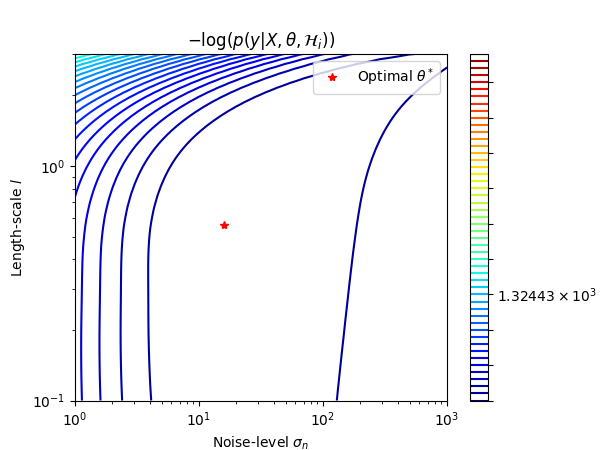

25.507405890181456 10000000
[2.55074059e+01 3.31753842e+01 4.31484926e+01 5.61196941e+01
 7.29902688e+01 9.49324372e+01 1.23470810e+02 1.60588324e+02
 2.08864020e+02 2.71652246e+02 3.53315726e+02 4.59528695e+02
 5.97671164e+02 7.77341708e+02 1.01102440e+03 1.31495626e+03
 1.71025541e+03 2.22438850e+03 2.89307910e+03 3.76278995e+03
 4.89395129e+03 6.36515979e+03 8.27863962e+03 1.07673454e+04
 1.40042003e+04 1.82141111e+04 2.36895956e+04 3.08111079e+04
 4.00734730e+04 5.21202692e+04 6.77885458e+04 8.81669841e+04
 1.14671542e+05 1.49143840e+05 1.93979121e+05 2.52292683e+05
 3.28136335e+05 4.26779932e+05 5.55077543e+05 7.21943690e+05
 9.38972758e+05 1.22124461e+06 1.58837238e+06 2.06586527e+06
 2.68690099e+06 3.49463104e+06 4.54517906e+06 5.91154044e+06
 7.68865427e+06 1.00000000e+07]


<IPython.core.display.Javascript object>


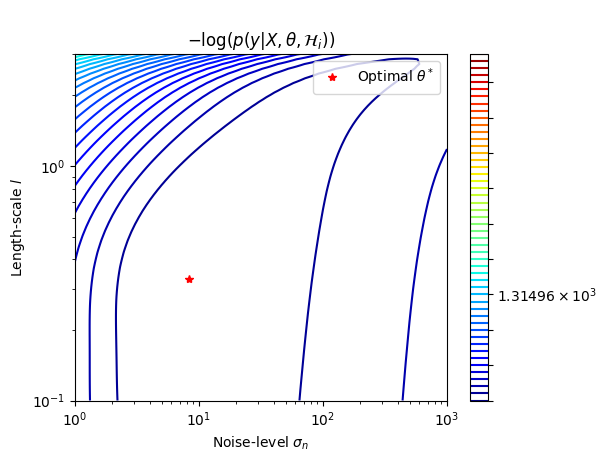

11.331045087469569 10000000
[1.13310451e+01 1.49834353e+01 1.98131180e+01 2.61995755e+01
 3.46446106e+01 4.58117744e+01 6.05785038e+01 8.01050641e+01
 1.05925714e+02 1.40069259e+02 1.85218456e+02 2.44920811e+02
 3.23867313e+02 4.28261021e+02 5.66304453e+02 7.48844089e+02
 9.90222603e+02 1.30940581e+03 1.73147288e+03 2.28958686e+03
 3.02760039e+03 4.00350137e+03 5.29396921e+03 7.00039974e+03
 9.25687223e+03 1.22406843e+04 1.61862829e+04 2.14036853e+04
 2.83028380e+04 3.74258278e+04 4.94894748e+04 6.54416550e+04
 8.65357781e+04 1.14429271e+05 1.51313808e+05 2.00087515e+05
 2.64582685e+05 3.49866894e+05 4.62641171e+05 6.11766523e+05
 8.08960166e+05 1.06971618e+06 1.41452294e+06 1.87047292e+06
 2.47339144e+06 3.27065159e+06 4.32489644e+06 5.71896109e+06
 7.56238130e+06 1.00000000e+07]


<IPython.core.display.Javascript object>


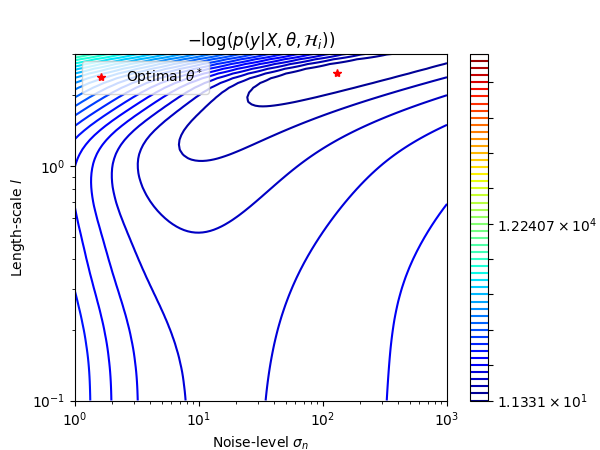

34.832638922940575 10000000
[3.48326389e+01 4.50167783e+01 5.81784899e+01 7.51883366e+01
 9.71714113e+01 1.25581754e+02 1.62298526e+02 2.09750309e+02
 2.71075734e+02 3.50331086e+02 4.52758601e+02 5.85133202e+02
 7.56210625e+02 9.77306547e+02 1.26304505e+03 1.63232591e+03
 2.10957470e+03 2.72635836e+03 3.52347321e+03 4.55364329e+03
 5.88500776e+03 7.60562788e+03 9.82931167e+03 1.27031416e+04
 1.64172032e+04 2.12171578e+04 2.74204917e+04 3.54375159e+04
 4.57985053e+04 5.91887731e+04 7.64939999e+04 9.88588159e+04
 1.27762511e+05 1.65116879e+05 2.13392673e+05 2.75783029e+05
 3.56414669e+05 4.60620861e+05 5.95294179e+05 7.69342402e+05
 9.94277707e+05 1.28497813e+06 1.66067164e+06 2.14620796e+06
 2.77370222e+06 3.58465916e+06 4.63271838e+06 5.98720232e+06
 7.73770141e+06 1.00000000e+07]


<IPython.core.display.Javascript object>


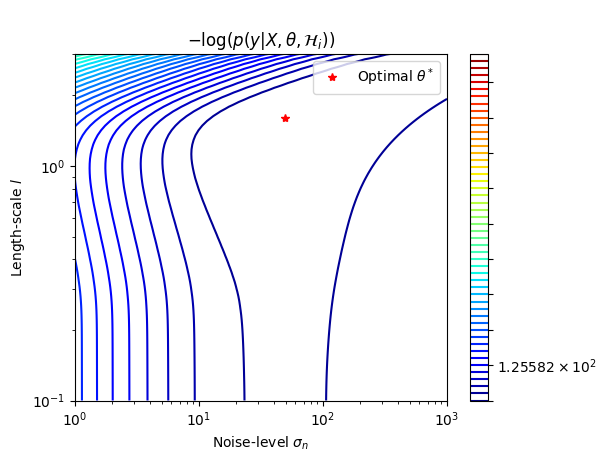

-10.701131267252034 10000000
[9.34480640e-02 1.36281285e-01 1.98747710e-01 2.89846490e-01
 4.22701663e-01 6.16452856e-01 8.99012605e-01 1.31108755e+00
 1.91204278e+00 2.78845421e+00 4.06658102e+00 5.93055505e+00
 8.64890752e+00 1.26132547e+01 1.83947156e+01 2.68261896e+01
 3.91223471e+01 5.70546195e+01 8.32063988e+01 1.21345210e+02
 1.76965477e+02 2.58080067e+02 3.76374658e+02 5.48891223e+02
 8.00483157e+02 1.16739576e+03 1.70248785e+03 2.48284687e+03
 3.62089429e+03 5.28058161e+03 7.70100970e+03 1.12308747e+04
 1.63787025e+04 2.38861088e+04 3.48346394e+04 5.08015813e+04
 7.40871934e+04 1.08046090e+05 1.57570520e+05 2.29795161e+05
 3.35124973e+05 4.88734169e+05 7.12752280e+05 1.03945221e+06
 1.51589960e+06 2.21073329e+06 3.22405368e+06 4.70184357e+06
 6.85699903e+06 1.00000000e+07]


<IPython.core.display.Javascript object>


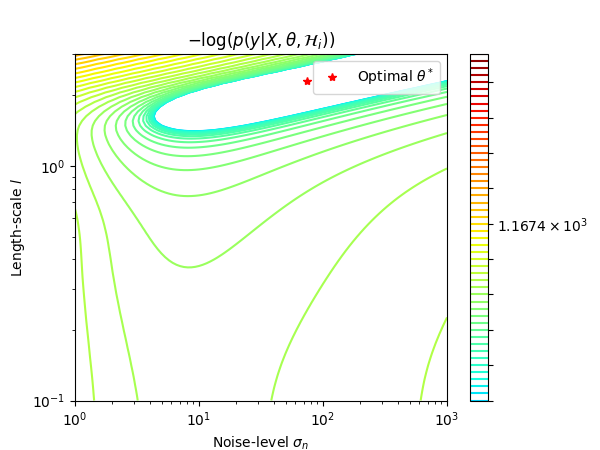

-2.8886321141800106 10000000
[3.46184616e-01 4.91548970e-01 6.97952416e-01 9.91025525e-01
 1.40716125e+00 1.99803408e+00 2.83701686e+00 4.02829198e+00
 5.71978845e+00 8.12155130e+00 1.15318243e+01 1.63740851e+01
 2.32496312e+01 3.30122475e+01 4.68742269e+01 6.65569088e+01
 9.45044302e+01 1.34187232e+02 1.90533006e+02 2.70538603e+02
 3.84138883e+02 5.45440390e+02 7.74473067e+02 1.09967751e+03
 1.56143665e+03 2.21709037e+03 3.14805579e+03 4.46993745e+03
 6.34688268e+03 9.01196499e+03 1.27961264e+04 1.81692728e+04
 2.57986257e+04 3.66315754e+04 5.20133255e+04 7.38539362e+04
 1.04865510e+05 1.48898971e+05 2.11422266e+05 3.00199350e+05
 4.26254300e+05 6.05240245e+05 8.59383129e+05 1.22024166e+06
 1.73262619e+06 2.46016309e+06 3.49319576e+06 4.96000312e+06
 7.04272896e+06 1.00000000e+07]


<IPython.core.display.Javascript object>


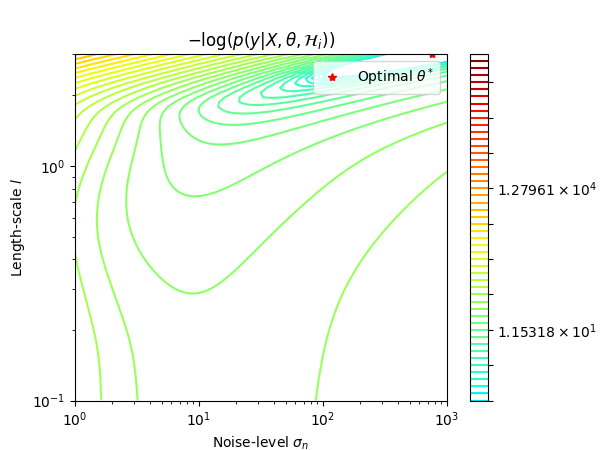

In [33]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
for i, idoe2plot in enumerate(ndoe2plot):
#     if idoe2plot < 14: 
#         continue
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_lml.npy'.format(idoe2plot)))
    noise_level,length_scale, lml_theta = data_set
    lml_theta = -lml_theta
    vmin, vmax = lml_theta.min(), lml_theta.max()
    vmax = 10000000
    level = np.logspace(np.log10(abs(vmin))*np.sign(vmin), np.log10(vmax), 50)
    print(vmin, vmax)
    print(level)
#     print(lml_theta[np.where(lml_theta<0)])
#     print(sum(lml_theta<0), sum(lml_theta>0))
    model_params = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_params.npy'.format(idoe2plot)))
    # print()
    plt.figure(figsize=figsize)
    plt.contour(noise_level,length_scale, lml_theta,levels=level,norm=SymLogNorm(1e-2,linscale=0.03,vmin=vmin,vmax=vmax))
    theta_opt = np.exp(model_params[0]['opt_theta'])
    plt.plot(theta_opt[0],theta_opt[1],'r*',label=r'Optimal $\theta^*$')
    plt.colorbar()
    plt.set_cmap('jet')
    plt.ylim(0.1,3)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"Length-scale $l$")
    plt.xlabel(r"Noise-level $\sigma_n$")
    plt.title(r"$-\log(p(y|X,\theta,\mathcal{H}_i))$")
    plt.legend()
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,r'{}_Uniform_DoE{}_lml.pdf'.format(metamodel_class,idoe2plot)))
    # plt.tight_layout()



In [ ]:
a = LogNorm(vmin=-1,vmax=2)
print(dir(a))
print(a.vmin,a.vmax)

In [34]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
for i, idoe2plot in enumerate(ndoe2plot):
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_lml.npy'.format(idoe2plot)))
    noise_level,length_scale, lml_theta = data_set
    vmin, vmax = (-lml_theta).min(), (-lml_theta).max()
    vmax = 50
    level = np.around(np.logspace(np.log10(abs(vmin))*np.sign(vmin), np.log10(vmax), 50), decimals=2)
    print(vmin, vmax)
    print(level)
    model_params = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_params.npy'.format(idoe2plot)))
    # print()
    plt.figure(figsize=figsize)
    plt.contour(noise_level,length_scale, -lml_theta,levels=level,norm=LogNorm(vmin=vmin,vmax=vmax))
    theta_opt = np.exp(model_params[0]['opt_theta'])
    plt.plot(theta_opt[0],theta_opt[1],'r*',label=r'Optimal $\theta^*$')
    plt.colorbar()
    plt.ylim(0.1,3)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"Length-scale $l$")
    plt.xlabel(r"Noise-level $\sigma_n$")
    plt.title(r"$-\log(p(y|X,\theta,\mathcal{H}_i))$")
    plt.legend()
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,r'{}_Uniform_DoE{}_lml.pdf'.format(metamodel_class,idoe2plot)))
    # plt.tight_layout()



25.772546212538867 50
[25.77 26.12 26.48 26.84 27.21 27.58 27.95 28.33 28.72 29.11 29.5  29.91
 30.31 30.73 31.15 31.57 32.   32.43 32.88 33.32 33.78 34.24 34.7  35.18
 35.66 36.14 36.63 37.13 37.64 38.15 38.67 39.2  39.73 40.27 40.82 41.37
 41.94 42.51 43.09 43.67 44.27 44.87 45.48 46.1  46.73 47.37 48.01 48.67
 49.33 50.  ]


<IPython.core.display.Javascript object>

25.507405890181456 50
[25.51 25.86 26.22 26.58 26.95 27.32 27.7  28.08 28.47 28.86 29.26 29.67
 30.08 30.49 30.92 31.34 31.78 32.22 32.66 33.11 33.57 34.04 34.51 34.98
 35.47 35.96 36.46 36.96 37.47 37.99 38.51 39.05 39.59 40.14 40.69 41.25
 41.82 42.4  42.99 43.58 44.19 44.8  45.42 46.04 46.68 47.33 47.98 48.65
 49.32 50.  ]


<IPython.core.display.Javascript object>

11.331045087469569 50
[11.33 11.68 12.04 12.41 12.79 13.18 13.59 14.01 14.44 14.88 15.34 15.81
 16.3  16.8  17.32 17.85 18.4  18.96 19.55 20.15 20.77 21.41 22.07 22.74
 23.44 24.17 24.91 25.68 26.46 27.28 28.12 28.98 29.87 30.79 31.74 32.72
 33.72 34.76 35.83 36.93 38.07 39.24 40.45 41.69 42.97 44.29 45.66 47.06
 48.51 50.  ]


<IPython.core.display.Javascript object>

34.832638922940575 50
[34.83 35.09 35.35 35.61 35.88 36.14 36.41 36.68 36.95 37.22 37.5  37.78
 38.06 38.34 38.62 38.91 39.2  39.49 39.78 40.07 40.37 40.67 40.97 41.27
 41.58 41.89 42.2  42.51 42.82 43.14 43.46 43.78 44.11 44.43 44.76 45.09
 45.43 45.76 46.1  46.44 46.79 47.13 47.48 47.84 48.19 48.55 48.91 49.27
 49.63 50.  ]


<IPython.core.display.Javascript object>

-10.701131267252034 50
[ 0.09  0.11  0.12  0.14  0.16  0.18  0.2   0.23  0.26  0.3   0.34  0.38
  0.44  0.49  0.56  0.64  0.73  0.83  0.94  1.07  1.21  1.38  1.57  1.78
  2.03  2.3   2.62  2.98  3.39  3.85  4.38  4.97  5.65  6.43  7.31  8.31
  9.44 10.73 12.2  13.87 15.77 17.93 20.38 23.17 26.34 29.94 34.03 38.69
 43.98 50.  ]


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


ValueError: values must all be positive

#### Exceedance plot

<IPython.core.display.Javascript object>


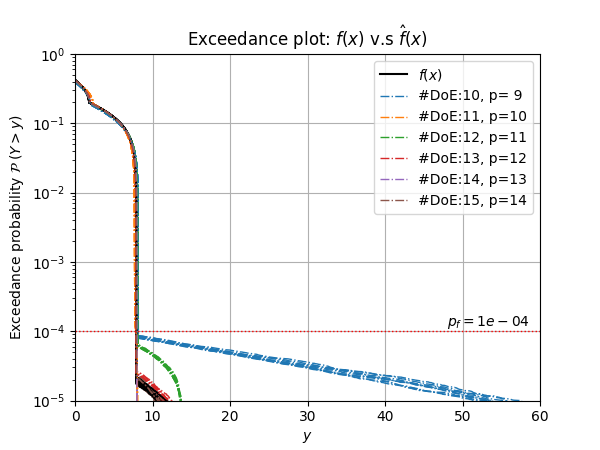

In [61]:
print(MODEL_DIR_DATA)
metamodel_class, metamodel_basis= ['PCE', list(np.arange(10,16))]
pce_exceedance_values = []
# ndoe2plot = list(np.arange(10,16))
ndoe2plot = list(np.arange(10,16))
label_added =False
fig2 = plt.figure(figsize=figsize)
ax2 = fig2.add_subplot(1,1,1)
for r in range(9):
    exceedance_values = []
    #Ture model emperical exceedance plot with mcs results
    iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Bench1_noise_free_MC_DoE{}_ecdf.npy'.format(r)))
    exceedance_values.append(iecdf[2,0])
#     print(iecdf.shape)
    if not label_added:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k', label=r'$f(x)$')
    else:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k')

    for i, idoe in enumerate(ndoe2plot):
        # PCE model emperical exceedance plot with mcs results
        iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_Quadrature_DoE{}_MCS{}_ecdf.npy'.format(idoe,r)))
        exceedance_values.append(iecdf[2,0])
#         print(iecdf.shape)
        if not label_added:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'#DoE:{}, p={:>2d}'.format(idoe,idoe-1))
        else:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1)  
#         # GPR model emperical exceedance plot with mcs results
#         iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_Uniform_DoE{}_MCS{}_ecdf.npy'.format(idoe, r)))
#         if not label_added:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'GPR RBF:')
#         else:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1)  
    pce_exceedance_values.append(exceedance_values)
    label_added =True
       
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:
ax2.set_xlim(0,60)
ax2.set_ylim(1e-5,1)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
ax2.text(xmax*0.8,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax2.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend()
plt.grid()
# plt.show()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


In [43]:
ax2.set_xlim(7,9)
# ax2.set_ylim(0.8*pf,1.2*pf)
ax2.text(8.5,pf*1.2,r'$p_f={:.0e}$'.format(pf))
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}_zoomin.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


<IPython.core.display.Javascript object>


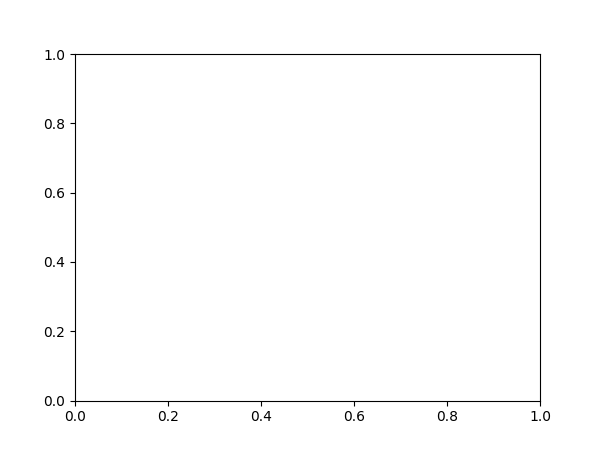

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jinsongliu/External/MUSE_UQ_DATA/Bench1/Data/DATA_NOISE_NORMAL/Train_noise_free_MCS_DoE0_ecdf.npy'

In [145]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
gpr_exceedance_values = []
ndoe2plot = list(np.arange(10,16))
# ndoe2plot = [10]
label_added =False
fig2 = plt.figure(figsize=figsize)
ax2 = fig2.add_subplot(1,1,1)
for r in range(10):
    exceedance_values = []
    # Ture model emperical exceedance plot with mcs results
    iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Train_noise_free_MCS_DoE{}_ecdf.npy'.format(r)))
    exceedance_values.append(iecdf[2,0])
    if not label_added:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k', label=r'$f(x) = x\sin x \;(\epsilon=0)$')
    else:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k')  
        
    for i, idoe2plot in enumerate(ndoe2plot):
#         # PCE model emperical exceedance plot with mcs results
#         iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_Quadrature_DoE{}_MCS{}_ecdf.npy'.format(idoe,r)))
#         if not label_added:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'PCE order: {}'.format(idoe-1))
#         else:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1) 
# 
        # GPR model emperical exceedance plot with mcs results
        data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_params.npy'.format(idoe2plot)))
        opt_theta = np.exp(data_set[0]['opt_theta'])
        
        iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_Uniform_DoE{}_MCS{}_ecdf.npy'.format(idoe2plot, r)))
        exceedance_values.append(iecdf[2,0])
        if not label_added:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'#DoE: {}, GPR:RBF$(\sigma={:>4.2f},l={:>4.2f})$'.format(idoe2plot,opt_theta[0]**0.5, opt_theta[1]))
        else:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1) 
    gpr_exceedance_values.append(exceedance_values)
    label_added =True
       
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:
ax2.set_xlim(0,20)
ax2.set_ylim(1e-5,2)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
ax2.text(xmax*0.8,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax2.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend(fontsize=8,loc=1)
plt.grid()
plt.show()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


In [57]:
ax2.set_xlim(7,9)
# ax2.set_ylim(0.8*pf,1.2*pf)
ax2.text(8.5,pf*1.2,r'$p_f={:.0e}$'.format(pf))
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}_zoomin.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


<IPython.core.display.Javascript object>


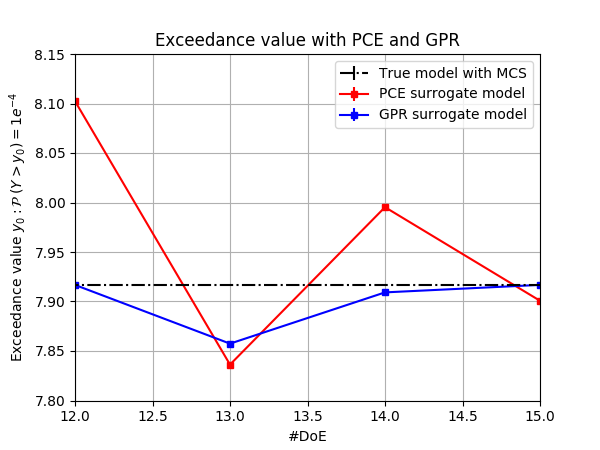

(7,)
[1.02823882e-07 2.50060769e-08 1.08179632e-02 6.72138801e-08
 7.30349019e-08 1.63327514e-07 1.48307191e-07]


In [111]:
fig = plt.figure(figsize=figsize)
pce_exceedance_values= np.array(pce_exceedance_values)
pce_exceedance_mean = np.mean(pce_exceedance_values,axis=0)
pce_exceedance_std  = np.std(pce_exceedance_values,axis=0)

gpr_exceedance_values= np.array(gpr_exceedance_values)
gpr_exceedance_mean = np.mean(gpr_exceedance_values,axis=0)
gpr_exceedance_std  = np.std(gpr_exceedance_values,axis=0)
# print(gpr_exceedance_values)
# print(gpr_exceedance_mean)
print(gpr_exceedance_std.shape)
print(pce_exceedance_std)
# plt.errorbar(X_train,y_train, noise_std, )
plt.errorbar(np.array(ndoe2plot), np.ones(6)*pce_exceedance_mean[0], np.ones(6)*pce_exceedance_std[0],fmt='-.k', markersize=4,zorder=9,label=r'True model with MCS')
plt.errorbar(np.array(ndoe2plot), pce_exceedance_mean[1:], pce_exceedance_std[1:],fmt='-rs', markersize=4,label=r'PCE surrogate model')
plt.errorbar(np.array(ndoe2plot), gpr_exceedance_mean[1:], gpr_exceedance_std[1:],fmt='-bs', markersize=4,label=r'GPR surrogate model')
plt.title('Exceedance value with PCE and GPR')
plt.xlabel('#DoE')
plt.ylabel(r'Exceedance value $y_0 : \mathcal{P}\;(Y>y_0) = 1e^{-4}$')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedanceValue_PCE_GPR.pdf'))


In [112]:
plt.xlim(12,15)
plt.ylim(7.8,8.15)
# ax2.set_ylim(0.8*pf,1.2*pf)
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedanceValue_PCE_GPR_zoomin.pdf'))


In [96]:
print(np.ones(5).shape)

(5,)


#### Noise case

In [8]:
noise_type = 'DATA_NOISE_NORMAL'
ndoe2plot = list(np.arange(10,16))

<IPython.core.display.Javascript object>


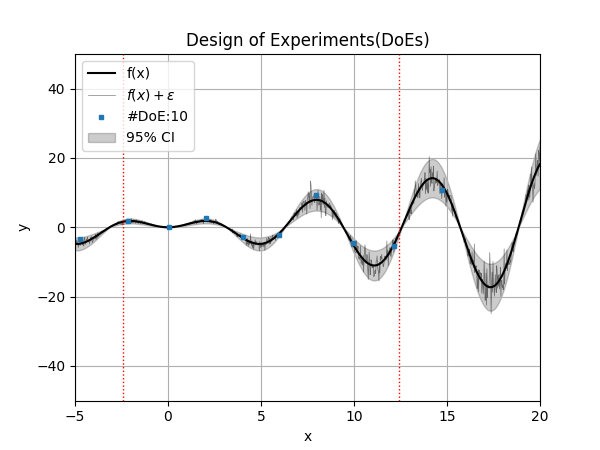

8
x_train shape:(10,)
x_weight shape:(10,)
y_train shape:(10,)
y_validate shape:(10,)
x_test shape:(1000,)
y_test shape:(1000,)


<IPython.core.display.Javascript object>


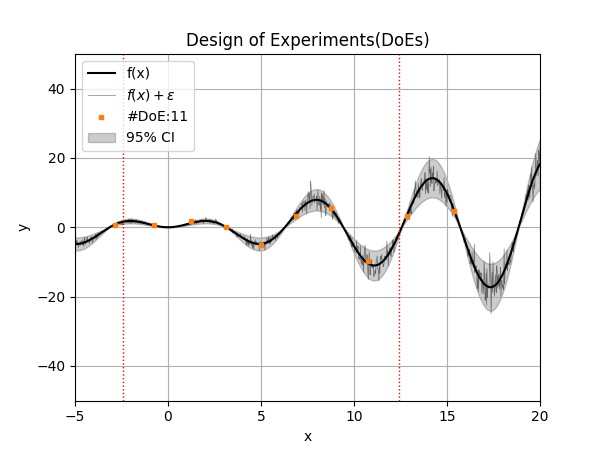

8
x_train shape:(11,)
x_weight shape:(11,)
y_train shape:(11,)
y_validate shape:(11,)
x_test shape:(1000,)
y_test shape:(1000,)


<IPython.core.display.Javascript object>


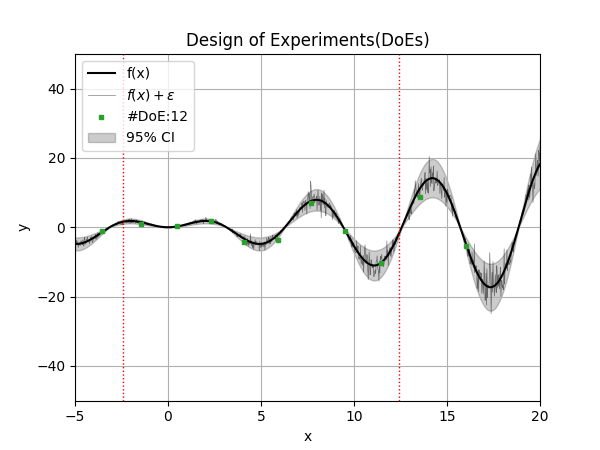

8
x_train shape:(12,)
x_weight shape:(12,)
y_train shape:(12,)
y_validate shape:(12,)
x_test shape:(1000,)
y_test shape:(1000,)


<IPython.core.display.Javascript object>


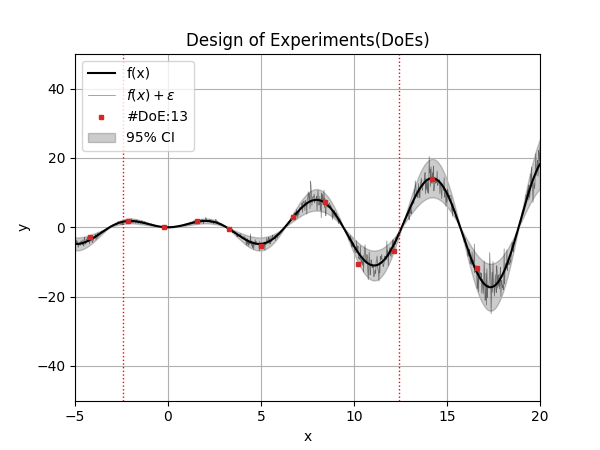

8
x_train shape:(13,)
x_weight shape:(13,)
y_train shape:(13,)
y_validate shape:(13,)
x_test shape:(1000,)
y_test shape:(1000,)


<IPython.core.display.Javascript object>


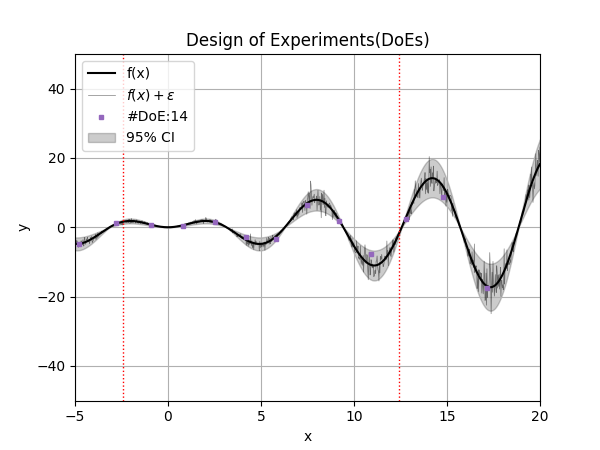

8
x_train shape:(14,)
x_weight shape:(14,)
y_train shape:(14,)
y_validate shape:(14,)
x_test shape:(1000,)
y_test shape:(1000,)


<IPython.core.display.Javascript object>


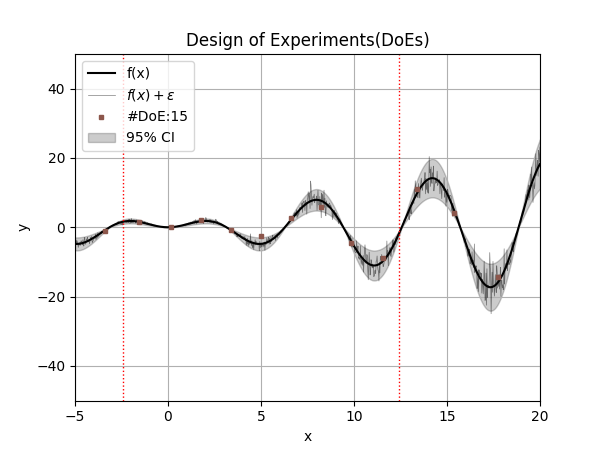

8
x_train shape:(15,)
x_weight shape:(15,)
y_train shape:(15,)
y_validate shape:(15,)
x_test shape:(1000,)
y_test shape:(1000,)


In [126]:
for i, idoe2plot in enumerate(ndoe2plot):
    ## data set with noise: [x,y,zeta]
    data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_noise_free.npy'))
    x,y_mean = data_set[0],data_set[1]

    fig1= plt.figure(figsize=figsize)
    ax1 = fig1.add_subplot(1,1,1)
    ax1.plot(x,y_mean,'k',label=r'f(x)')

    ## data set with noise: [x,y,zeta,idoe_mean, idoe_std]
    data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_normal.npy'))
    x_samples,y_samples = data_set[0],data_set[1]
    std = data_set[4]

    ax1.plot(x_samples,y_samples,'-k',label=r'$f(x)+\epsilon$',alpha=0.5,linewidth=0.5)
    ax1.fill_between(x, y_mean + 1.96*std, y_mean - 1.96*std, color='k',alpha=0.2,edgecolor='None',label='95% CI')

    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_train_validation_test_Quadrature_DoE{}.npy'.format(idoe2plot)))
    print(len(data_set))
    x_train    = np.squeeze(data_set[0])
    x_weight   = np.squeeze(data_set[1])
    y_train    = np.squeeze(data_set[2])
    zeta_train = np.squeeze(data_set[3])
    y_validate = np.squeeze(data_set[4])
    x_test     = np.squeeze(data_set[5])
    y_test     = np.squeeze(data_set[7])
    print('x_train shape:{}'.format(x_train.shape))
    print('x_weight shape:{}'.format(x_weight.shape))
    print('y_train shape:{}'.format(y_train.shape))
    print('y_validate shape:{}'.format(y_validate.shape))
    print('x_test shape:{}'.format(x_test.shape))
    print('y_test shape:{}'.format(y_test.shape))

    ax1.plot(x_train,y_train,'s',color=pltcolors[i],markersize=3,
             zorder=9, label=r'#DoE:{}'.format(idoe2plot))

#     for i, imetamodel_basis in enumerate(metamodel_basis[:2]):
#         ax1.plot(x_train,y_validate[i,:],'o',
#                  markeredgecolor=pltcolors[i], markerfacecolor='w',
#                  label=r'$PCE: p={:d}$'.format(imetamodel_basis))
#         ax1.plot(x_test,y_test[i,:],'-',color=pltcolors[i],alpha=0.4)
    
#     ax1.plot(x_train,y_validate,'o',
#              markeredgecolor=pltcolors[i], markerfacecolor='w',
#              label=r'$PCE: p={:d}$'.format(idoe2plot))
#     ax1.plot(x_test,y_test,'-',color=pltcolors[i],alpha=0.5,label=r'#DoE:{:d}, p={:d}'.format(idoe2plot,idoe2plot-1))
    ax1.set_ylim(-50,50)
    ax1.set_xlim(-5,20)
    ax1.plot([dist_x.inv(pf), dist_x.inv(pf)],ax1.get_ylim(),':r',linewidth=1)
    ax1.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax1.get_ylim(),':r',linewidth=1)
#     ax1.set_xlim()
#     ax1.set_ylim(-20,20)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(r'Design of Experiments(DoEs)')
    # ax1.legend(loc=8,fontsize=10,ncol=3)
    icol = i//3+1
#     ax1.legend(fontsize=10,ncol=icol,loc=2)
    ax1.legend(fontsize=10,loc=2)
    ax1.grid(True)
    fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'Quadrature_DoE{}.pdf'.format(idoe2plot)))
#     fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}.png'.format(metamodel_class,idoe2plot)),facecolor='w')

<IPython.core.display.Javascript object>


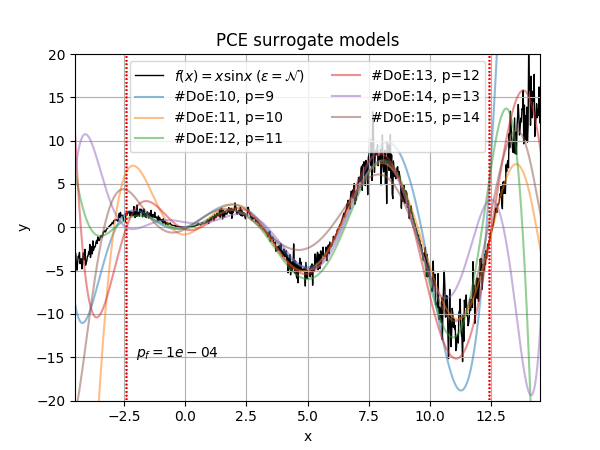

8
x_train shape:(10,)
x_weight shape:(10,)
y_train shape:(10,)
y_validate shape:(10,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(11,)
x_weight shape:(11,)
y_train shape:(11,)
y_validate shape:(11,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(12,)
x_weight shape:(12,)
y_train shape:(12,)
y_validate shape:(12,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(13,)
x_weight shape:(13,)
y_train shape:(13,)
y_validate shape:(13,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(14,)
x_weight shape:(14,)
y_train shape:(14,)
y_validate shape:(14,)
x_test shape:(1000,)
y_test shape:(1000,)
8
x_train shape:(15,)
x_weight shape:(15,)
y_train shape:(15,)
y_validate shape:(15,)
x_test shape:(1000,)
y_test shape:(1000,)


In [134]:
metamodel_class, metamodel_basis= ['PCE', list(np.arange(10,16))]
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_normal.npy'))
x,y_mean = data_set[0],data_set[1]
    
fig1 = plt.figure(figsize=figsize)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,y_mean,'k',label=r'$f(x) = x\sin x \;(\epsilon=\mathcal{N})$',zorder=0,linewidth=1)
# print(data_set[0].shape, data_set[1].shape)
for i, idoe2plot in enumerate(ndoe2plot):

    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_train_validation_test_Quadrature_DoE{}.npy'.format(idoe2plot)))
    print(len(data_set))
    x_train    = np.squeeze(data_set[0])
    x_weight   = np.squeeze(data_set[1])
    y_train    = np.squeeze(data_set[2])
    zeta_train = np.squeeze(data_set[3])
    y_validate = np.squeeze(data_set[4])
    x_test     = np.squeeze(data_set[5])
    y_test     = np.squeeze(data_set[7])
    print('x_train shape:{}'.format(x_train.shape))
    print('x_weight shape:{}'.format(x_weight.shape))
    print('y_train shape:{}'.format(y_train.shape))
    print('y_validate shape:{}'.format(y_validate.shape))
    print('x_test shape:{}'.format(x_test.shape))
    print('y_test shape:{}'.format(y_test.shape))

#     ax1.plot(x_train,y_train,'x',color=pltcolors[i],
#              zorder=9, label=r'Training Data')

#     for i, imetamodel_basis in enumerate(metamodel_basis[:2]):
#         ax1.plot(x_train,y_validate[i,:],'o',
#                  markeredgecolor=pltcolors[i], markerfacecolor='w',
#                  label=r'$PCE: p={:d}$'.format(imetamodel_basis))
#         ax1.plot(x_test,y_test[i,:],'-',color=pltcolors[i],alpha=0.4)
    
#     ax1.plot(x_train,y_validate,'o',
#              markeredgecolor=pltcolors[i], markerfacecolor='w',
#              label=r'$PCE: p={:d}$'.format(idoe2plot))
    ax1.plot(x_test,y_test,'-',color=pltcolors[i],alpha=0.5,zorder=2,label=r'#DoE:{:d}, p={:d}'.format(idoe2plot,idoe2plot-1))
    ax1.set_ylim(-50,50)
    ax1.set_xlim(-5,20)
    ax1.plot([dist_x.inv(pf), dist_x.inv(pf)],ax1.get_ylim(),':r',linewidth=1)
    ax1.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax1.get_ylim(),':r',linewidth=1)
    ax1.text(-2,-40,r'$p_f={:.0e}$'.format(pf))
#     ax1.set_xlim()
#     ax1.set_ylim(-20,20)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(u'PCE surrogate models'.format(metamodel_class,MODEL_NAME))
    # ax1.legend(loc=8,fontsize=10,ncol=3)
    icol = i//3+1
    ax1.legend(fontsize=10,ncol=icol,loc=2)
    ax1.grid(True)
    fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}.pdf'.format(metamodel_class,idoe2plot)))
#     fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}.png'.format(metamodel_class,idoe2plot)),facecolor='w')

In [137]:
ax1.set_xlim(dist_x.inv(pf/100), dist_x.inv(1-pf/100))
ax1.set_ylim(-20,20)
ax1.legend(fontsize=10,ncol=2)
ax1.text(-2,-15,r'$p_f={:.0e}$'.format(pf))
fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Quadrature_DoE{}_zoomin.pdf'.format(metamodel_class,idoe2plot)))

<IPython.core.display.Javascript object>


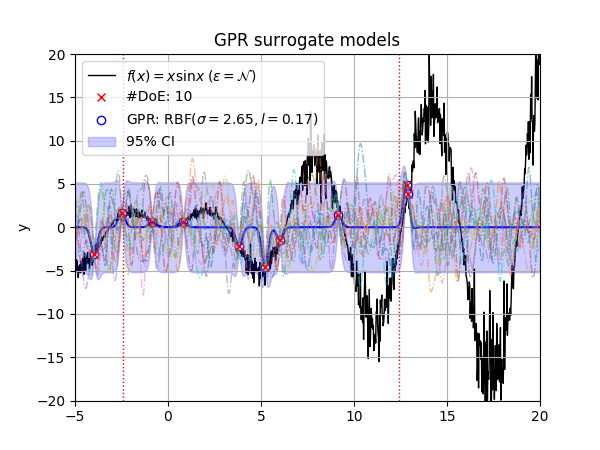

7
x_train shape:(10,)
y_train shape:(10,)
y_validate shape:(10,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


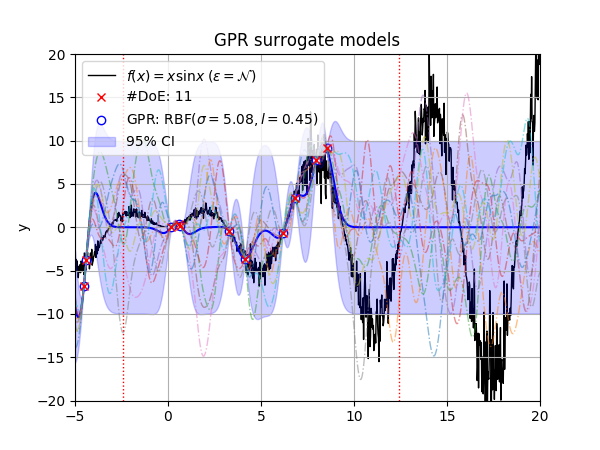

7
x_train shape:(11,)
y_train shape:(11,)
y_validate shape:(11,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


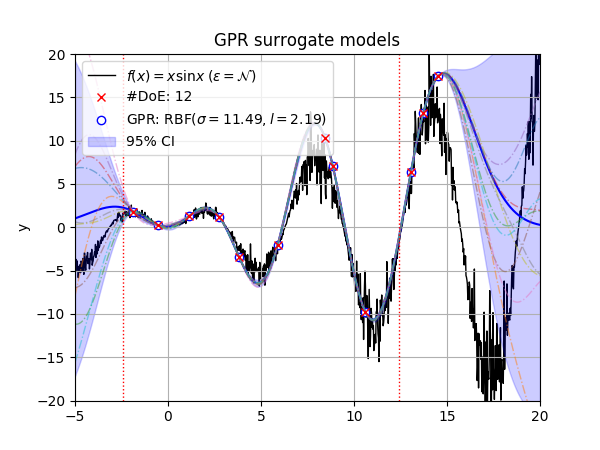

7
x_train shape:(12,)
y_train shape:(12,)
y_validate shape:(12,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


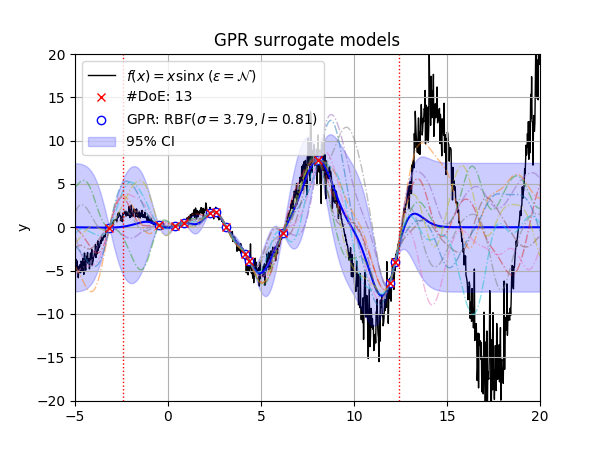

7
x_train shape:(13,)
y_train shape:(13,)
y_validate shape:(13,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


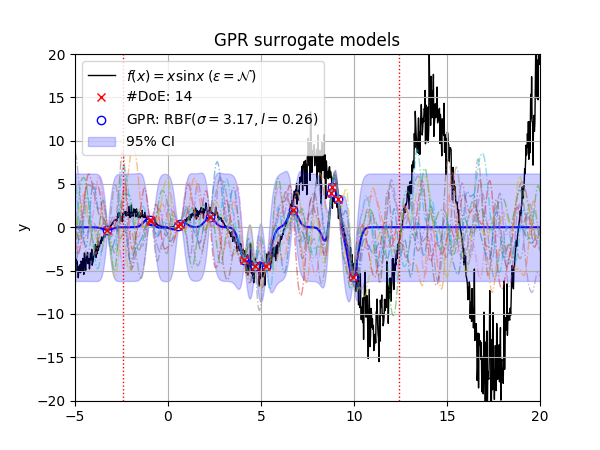

7
x_train shape:(14,)
y_train shape:(14,)
y_validate shape:(14,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


<IPython.core.display.Javascript object>


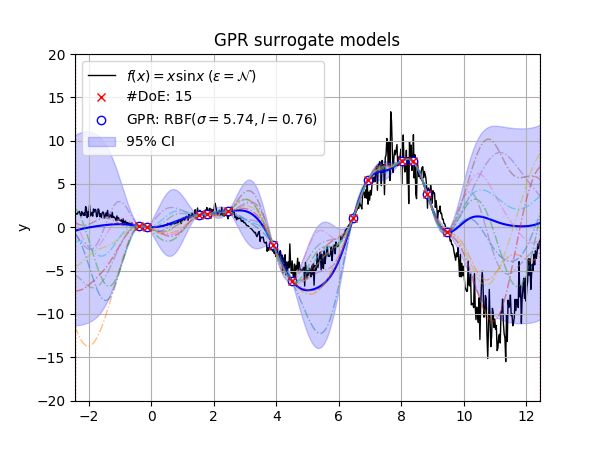

7
x_train shape:(15,)
y_train shape:(15,)
y_validate shape:(15,)
x_test shape:(1000,)
y_test_mean shape:(1000,)
y_test_std shape:(1000,)


In [140]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench1_normal.npy'))
x,y_mean = data_set[0],data_set[1]

# print(data_set[0].shape, data_set[1].shape)


for i, idoe2plot in enumerate(ndoe2plot):
    fig3 = plt.figure(figsize=figsize)
    ax3 = fig3.add_subplot(1,1,1)
    ax3.plot(x,y_mean,'k',label=r'$f(x) = x\sin x \;(\epsilon=\mathcal{N})$',zorder=0,linewidth=1)    
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}.npy'.format(idoe2plot)))
    print(len(data_set))
    x_train    = np.squeeze(data_set[0])
    y_train    = np.squeeze(data_set[1])
    zeta_train = np.squeeze(data_set[2])
    y_validate = np.squeeze(data_set[3][0,:])
    y_valid_std= np.squeeze(data_set[3][1,:])
    x_test     = np.squeeze(data_set[4])
    y_test_mean= np.squeeze(data_set[6][0,:])
    y_test_std = np.squeeze(data_set[6][1,:])
    print('x_train shape:{}'.format(x_train.shape))
    # print('x_weight shape:{}'.format(x_weight.shape))
    print('y_train shape:{}'.format(y_train.shape))
    print('y_validate shape:{}'.format(y_validate.shape))
    print('x_test shape:{}'.format(x_test.shape))
    print('y_test_mean shape:{}'.format(y_test_mean.shape))
    print('y_test_std shape:{}'.format(y_test_std.shape))
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_params.npy'.format(idoe2plot)))
    opt_theta = np.exp(data_set[0]['opt_theta'])
    
    
    ax3.plot(x_train,y_train,'rx',zorder=9, label=r'#DoE: {}'.format(idoe2plot))
    ax3.plot(x_train,y_validate,'o', markeredgecolor='b', markerfacecolor='w', label=r'GPR: RBF$(\sigma={:.2f},l={:.2f})$'.format(opt_theta[0]**0.5, opt_theta[1]))

    ax3.plot(x_test,y_test_mean,'-', color='b')
    ax3.fill_between(x_test, y_test_mean - 1.96*y_test_std, y_test_mean + 1.96*y_test_std,
                     color='b',alpha=0.2,edgecolor='None',label='95% CI')

    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_sample_y.npy'.format(idoe2plot))) 
#     print(len(data_set))
    for i in range(1, len(data_set)):
        ax3.plot(data_set[0],data_set[i],'-.',linewidth=1,alpha=0.5)

    ax3.set_ylim(-20,20)
    ax3.legend(loc=8,fontsize=10,ncol=3)
    ax3.plot([dist_x.inv(pf), dist_x.inv(pf)],ax3.get_ylim(),':r',linewidth=1)
    ax3.plot([dist_x.inv(1-pf), dist_x.inv(1-pf)],ax3.get_ylim(),':r',linewidth=1)
    # ax3.set_ylim(-50,50)
    ax3.set_xlim(-5,20)
    ax3.set_title('GPR surrogate models')
    ax3.set_ylabel('y')
#     ax3.set_title(u'Benchmark problem 1:  $f(x) = x\sin x \;(\epsilon=0)$'.format(metamodel_class,MODEL_NAME))
    # ax3.legend(loc=8,fontsize=10,ncol=3)
    ax3.legend(fontsize=10,loc=2)
    ax3.grid()
    fig3.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Uniform_DoE{}.pdf'.format(metamodel_class,idoe2plot)))
    plt.show()



In [141]:
ax3.set_xlim(dist_x.inv(pf), dist_x.inv(1-pf))
ax3.set_ylim(-20,20)
fig3.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_Uniform_DoE{}_zoomin.pdf'.format(metamodel_class,idoe2plot)))

#### Exceedance plot

In [11]:
MODEL_DIR_FIGURE

'/Users/jinsongliu/BoxSync/MUSELab/museuq/examples/bench1/Bench1/Figures'

/Users/jinsongliu/External/MUSE_UQ_DATA/Bench1/DataDATA_NOISE_NORMAL


<IPython.core.display.Javascript object>


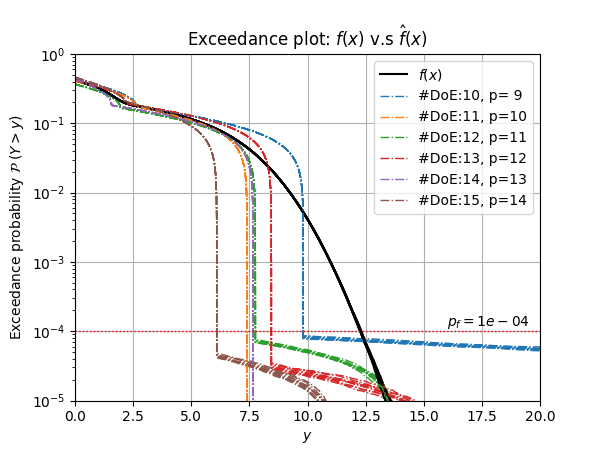

In [13]:
print(MODEL_DIR_DATA+noise_type)
metamodel_class, metamodel_basis= ['PCE', list(np.arange(10,16))]
pce_exceedance_values = []
# ndoe2plot = list(np.arange(10,16))
ndoe2plot = list(np.arange(10,16))
label_added =False
fig2 = plt.figure(figsize=figsize)
ax2 = fig2.add_subplot(1,1,1)
for r in range(9):
    exceedance_values = []
    #Ture model emperical exceedance plot with mcs results
    iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Train_normal_MCS_DoE{}_ecdf.npy'.format(r)))
    exceedance_values.append(iecdf[2,0])
#     print(iecdf.shape)
    if not label_added:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k', label=r'$f(x)$')
    else:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k')

    for i, idoe in enumerate(ndoe2plot):
        # PCE model emperical exceedance plot with mcs results
        iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_Quadrature_DoE{}_MCS{}_ecdf.npy'.format(idoe,r)))
        exceedance_values.append(iecdf[2,0])
#         print(iecdf.shape)
        if not label_added:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'#DoE:{}, p={:>2d}'.format(idoe,idoe-1))
        else:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1)  
#         # GPR model emperical exceedance plot with mcs results
#         iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_Uniform_DoE{}_MCS{}_ecdf.npy'.format(idoe, r)))
#         if not label_added:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'GPR RBF:')
#         else:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1)  
    pce_exceedance_values.append(exceedance_values)
    label_added =True
       
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:
ax2.set_xlim(0,20)
ax2.set_ylim(1e-5,1)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
ax2.text(xmax*0.8,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax2.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend()
plt.grid()
plt.show()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


<IPython.core.display.Javascript object>


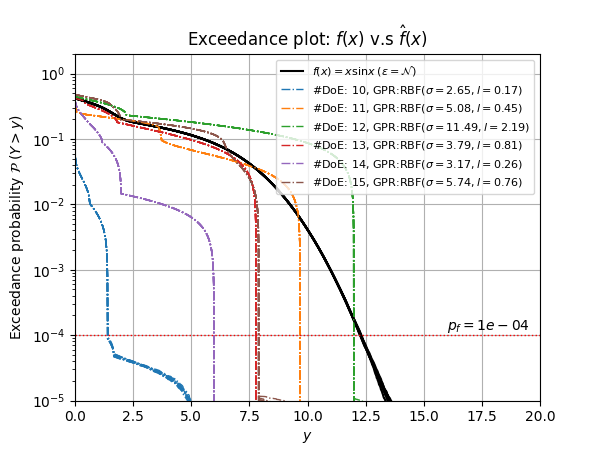

In [146]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
gpr_exceedance_values = []
ndoe2plot = list(np.arange(10,16))
# ndoe2plot = [10]
label_added =False
fig2 = plt.figure(figsize=figsize)
ax2 = fig2.add_subplot(1,1,1)
for r in range(10):
    exceedance_values = []
    # Ture model emperical exceedance plot with mcs results
    iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Train_normal_MCS_DoE{}_ecdf.npy'.format(r)))
    exceedance_values.append(iecdf[2,0])
    if not label_added:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k', label=r'$f(x) = x\sin x \;(\epsilon=\mathcal{N})$')
    else:
        ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k')  
        
    for i, idoe2plot in enumerate(ndoe2plot):
#         # PCE model emperical exceedance plot with mcs results
#         iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_Quadrature_DoE{}_MCS{}_ecdf.npy'.format(idoe,r)))
#         if not label_added:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'PCE order: {}'.format(idoe-1))
#         else:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1) 
# 
        # GPR model emperical exceedance plot with mcs results
        data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_train_validation_test_Uniform_DoE{}_params.npy'.format(idoe2plot)))
        opt_theta = np.exp(data_set[0]['opt_theta'])
        
        iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_Uniform_DoE{}_MCS{}_ecdf.npy'.format(idoe2plot, r)))
        exceedance_values.append(iecdf[2,0])
        if not label_added:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'#DoE: {}, GPR:RBF$(\sigma={:>4.2f},l={:>4.2f})$'.format(idoe2plot,opt_theta[0]**0.5, opt_theta[1]))
        else:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1) 
    gpr_exceedance_values.append(exceedance_values)
    label_added =True
       
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:
ax2.set_xlim(0,20)
ax2.set_ylim(1e-5,2)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
ax2.text(xmax*0.8,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax2.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend(fontsize=8,loc=1)
plt.grid()
plt.show()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


<IPython.core.display.Javascript object>


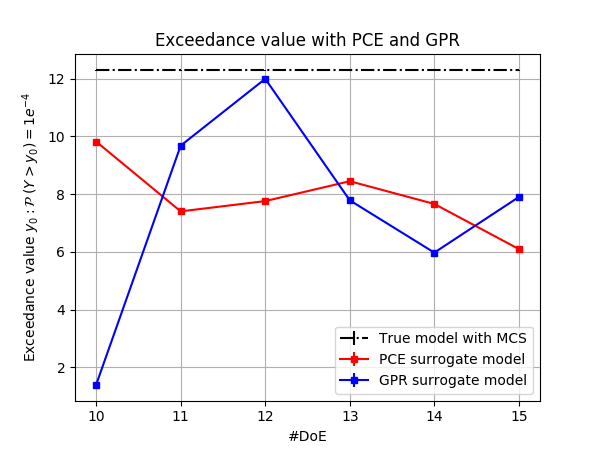

(7,)
[1.90028608e-02 5.72545719e-08 2.16575257e-07 4.70371458e-08
 1.07467168e-07 1.19579600e-07 4.53625303e-08]


In [147]:
fig = plt.figure(figsize=figsize)
pce_exceedance_values= np.array(pce_exceedance_values)
pce_exceedance_mean = np.mean(pce_exceedance_values,axis=0)
pce_exceedance_std  = np.std(pce_exceedance_values,axis=0)

gpr_exceedance_values= np.array(gpr_exceedance_values)
gpr_exceedance_mean = np.mean(gpr_exceedance_values,axis=0)
gpr_exceedance_std  = np.std(gpr_exceedance_values,axis=0)
# print(gpr_exceedance_values)
# print(gpr_exceedance_mean)
print(gpr_exceedance_std.shape)
print(pce_exceedance_std)
# plt.errorbar(X_train,y_train, noise_std, )
plt.errorbar(np.array(ndoe2plot), np.ones(6)*pce_exceedance_mean[0], np.ones(6)*pce_exceedance_std[0],fmt='-.k', markersize=4,zorder=9,label=r'True model with MCS')
plt.errorbar(np.array(ndoe2plot), pce_exceedance_mean[1:], pce_exceedance_std[1:],fmt='-rs', markersize=4,label=r'PCE surrogate model')
plt.errorbar(np.array(ndoe2plot), gpr_exceedance_mean[1:], gpr_exceedance_std[1:],fmt='-bs', markersize=4,label=r'GPR surrogate model')
plt.title('Exceedance value with PCE and GPR')
plt.xlabel('#DoE')
plt.ylabel(r'Exceedance value $y_0 : \mathcal{P}\;(Y>y_0) = 1e^{-4}$')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedanceValue_PCE_GPR.pdf'))


In [ ]:
metamodel_class, metamodel_basis = ['GPR', ['RBF']]
ndoe2plot = list(np.arange(10,16))
# ndoe2plot = [10]
label_added =False
fig2 = plt.figure(figsize=figsize)
ax2 = fig2.add_subplot(1,1,1)
for r in range(10):
    # Ture model emperical exceedance plot with mcs results
#     iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Bench1_noise_free_MC_DoE{}_ecdf.npy'.format(r)))
#     if not label_added:
#         ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k', label=r'$f(x)$')
#     else:
#         ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'k')  
        
    
    
    for i, idoe in enumerate(ndoe2plot):
#         # PCE model emperical exceedance plot with mcs results
#         iecdf = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'PCE_Quadrature_DoE{}_MCS{}_ecdf.npy'.format(idoe,r)))
#         if not label_added:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'PCE order: {}'.format(idoe-1))
#         else:
#             ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1)   
        # GPR model emperical exceedance plot with mcs results
        filepath_idoe_rmcs_ecdf = os.path.join(MODEL_DIR_DATA,noise_type,r'GPR_Uniform_DoE10_MCS{}_ecdf.npy'.format(r))
        iecdf = np.load(filepath_idoe_rmcs_ecdf)
        if not label_added:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1,label=r'#DoE: {}, GPR(RBF)'.format(idoe))
        else:
            ax2.semilogy(iecdf[0,:], 1-iecdf[1,:],'-.',color=pltcolors[i],linewidth=1)  
    label_added =True
       
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:
ax2.set_xlim(0,60)
ax2.set_ylim(1e-5,2)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
ax2.text(xmax*0.8,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax2.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend()
plt.grid()
plt.show()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_Quadrature_DoE{}_{}.pdf'.format(metamodel_class,ndoe2plot[0],ndoe2plot[-1])))


### 2   Benchmark 1

In [ ]:
label_added =False
fig = plt.figure(figsize=(4*1.5,3*1.5))
ax = fig.add_subplot(1,1,1)
print(len(true_y_mcs_ecdf2plot))
for iecdf2plot in true_y_mcs_ecdf2plot:
    if not label_added:
        ax.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'k', label=r'$f(x)$')
        label_added =True
    else:
        ax.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'k')    
label_added =False    
for imetamodel_ecdfs in metamodel_y_gpr_mcs_ecdf2plot:
    iecdf2plot = imetamodel_ecdfs
   
    if not label_added:
        ax.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'-.',color='b',linewidth=1, label=r'GPR RBF:')
        label_added =True
    else:
        ax.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'-.',color='b',linewidth=1)
#     print(i)
        
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:

ax.set_xlim(0,80)
ax.set_ylim(1e-5,2)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.plot([xmin,xmax],[pf,pf],'-.r')
ax.text(5,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend()
plt.grid()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_DoE0.pdf'.format(metamodel_class)))

In [ ]:
x_fix = np.linspace(-5,15,1000)[np.newaxis, :]
metamodel_class, metamodel_basis = ['GPR', 'RBF']

data_set = np.load(os.path.join(MODEL_DIR_DATA,'Noise_free',r'True_domain_FIX_DoE_fix0.npy'))
x,y = data_set[0].T,data_set[1].T
# print(data_set[0].shape, data_set[1].shape)
# print(x.shape, y.shape)
plt.figure()
plt.plot(x,y,'k',label=r'f(x)')
data_set = np.load(os.path.join(MODEL_DIR_DATA,'Noise_free',r'aDoE_Quadrature_hermite_train_GPR0.npy'))
print(len(data_set))
x_train    = np.squeeze(data_set[0][0])
x_weight   = np.squeeze(data_set[0][1])
y_train    = np.squeeze(data_set[1])
zeta_train = np.squeeze(data_set[2][0])
y_validate = np.squeeze(data_set[3][0,:])
y_valid_std= np.squeeze(data_set[3][1,:])
x_test     = np.squeeze(data_set[4])
y_test_mean= np.squeeze(data_set[6][0,:])
y_test_std = np.squeeze(data_set[6][1,:])
print(data_set[3].shape)
print(x_train.shape,y_validate.shape)
plt.plot(x_train,y_train,'rx',zorder=9, label=r'Training Data')

plt.plot(x_train,y_validate,'o', markeredgecolor='b', markerfacecolor='w', label=r'GPR: RBF')

plt.plot(x_test,y_test_mean,'-', color='b')
plt.fill_between(x_test, y_test_mean - 1.96*y_test_std, y_test_mean + 1.96*y_test_std,
                 color='b',alpha=0.2,edgecolor='None',label='95% confidence interval')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'{} surrogate model: {} $(\epsilon=0)$'.format(metamodel_class,MODEL_NAME))
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_DoE0.pdf'.format(metamodel_class)))

In [ ]:
metamodel_y_mcs_ecdf = [[] for _ in range(len(metamodel_basis))] 
metamodel_y_mcs_ecdf2plot = [[] for _ in range(len(metamodel_basis))]
print(data_set.shape)
metamodel_zeta_mcs = data_set[:,0]
metamodel_y_mcs    = data_set[:,1]
print(metamodel_y_mcs[0].shape)

for metamodel_zeta_mcs_r in metamodel_zeta_mcs:
    for i, imetamodel_zeta_mcs in enumerate(metamodel_zeta_mcs_r):
        print(np.round(imetamodel_zeta_mcs[:5],4))

for metamodel_y_mcs_r in metamodel_y_mcs:
    for i, imetamodel_y_mcs in enumerate(metamodel_y_mcs_r):
        iecdf = ECDF(np.squeeze(imetamodel_y_mcs))
        metamodel_y_mcs_ecdf[i].append(iecdf)
        
        indx1 = np.linspace(0,len(iecdf.x)-windowlength2plot, windowlength2plot, dtype=np.int32)
        indx2 = np.arange(indx1[-1]+1,len(iecdf.x),dtype=np.int32)
        indx  = np.hstack((indx1,indx2))
        metamodel_y_mcs_ecdf2plot[i].append(Ecdf2plot(iecdf.x[indx],iecdf.y[indx]))


In [ ]:
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_DoE0_zoomin.pdf'.format(metamodel_class)))


In [ ]:
plt.figure(figsize=(4*1.5, 3*1.5))
plt.subplot(1, 1, 1)
kernel  = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e4))
lim,res = [-5,20], 191
rng = np.random.RandomState(3)
# Training Data
x_fix = np.linspace(-5,15,1000)[np.newaxis, :]

data_set = np.load(os.path.join(MODEL_DIR_DATA,'Noise_free',r'True_domain_FIX_DoE_fix0.npy'))
x,y = data_set[0].T,data_set[1].T
# print(data_set[0].shape, data_set[1].shape)
plt.plot(x,y,'k',label=r'f(x)')
data_set = np.load(os.path.join(MODEL_DIR_DATA,'Noise_free',r'Train_Quadrature_hermite_PCE_doe0.npy'))
x_train    = data_set[0][0]
x_weight   = data_set[0][1]
y_train    = data_set[1]
zeta_train = data_set[2][0]
y_validate = data_set[3]
y_fix      = data_set[4]
# print(y_fix.shape)
plt.plot(x_train.T,y_train.T,'rx',zorder=9, label=r'Training Data')
print(x_fix.shape)



# Plot prior      
# Specify Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
#     y_mean, y_std = gp.predict(x_fix.T, return_std=True)
#     plt.plot(x_fix.T, y_mean, 'b-', zorder=9,label=r'Prediction')

#     plt.fill_between(np.squeeze(x_fix), y_mean - 1.96*y_std, y_mean + 1.96*y_std,
#                      color='b',alpha=0.2,edgecolor='None',label='95% confidence interval')

#     y_samples = gp.sample_y(X_[:, np.newaxis], 5)
#     plt.plot(X_, y_samples, '-.', lw=1,alpha=0.5)
# #     plt.ylim(-20,20)
# #     plt.fill_between(np.array([14,lim[1]]),np.array([20,20]),np.array([-20,-20]),'k',alpha=0.3)
#     plt.xlim(lim[0],lim[1])
# #     plt.ylim(-3, 3)
#     plt.xlabel("x")
#     plt.ylabel("y")
#     kernel_params = kernel.get_params()
#     kernel_str = "(RBF: $\sigma^2={:.2f}, l={:.2f}$)".format(kernel_params['k1__constant_value'],kernel_params['k2__length_scale'])
#     plt.title("Prior\n"+kernel_str)
#     plt.legend(loc=2)
#     plt.tight_layout()
#     plt.savefig("../Figures/GPR_RBF_prior.pdf")

#     # Plot posterior
#     plt.figure(figsize=(4*1.5, 3*1.5))
#     plt.subplot(1, 1, 1)
#     plt.plot(X_, y_, 'k', label=u'$f(x)=x\,\sin(x)$')
#     plt.plot(X_train,y_train, 'rs',markersize=4, label=r'Observations', zorder=9)
#     #  fit GP
gp.fit(x_train.T, np.squeeze(y_train))
y_mean, y_std = gp.predict(x_fix.T, return_std=True)

plt.plot(x_fix.T, y_mean, 'b', lw=2, zorder=8,label=r'Prediction') 
plt.fill_between(np.squeeze(x_fix), y_mean - 1.96*y_std, y_mean +  1.96*y_std,
                 color='b',alpha=0.2,edgecolor='None',
                 label='95% confidence interval')
kernel_params = gp.kernel_.get_params()
kernel_str = "(RBF: $\sigma^2={:.2f}, l={:.2f}$)".format(kernel_params['k1__constant_value'],kernel_params['k2__length_scale'])
plt.title("Posterior\n"+kernel_str)




#     plt.xlim(lim[0],lim[1])
#     plt.xlabel("x")
#     plt.ylabel("y")
#     kernel_params = gp.kernel_.get_params()
#     kernel_str = "(RBF: $\sigma^2={:.2f}, l={:.2f}$)".format(kernel_params['k1__constant_value'],kernel_params['k2__length_scale'])    

#     plt.title("Posterior\n"+kernel_str)
#     plt.legend()
#     plt.tight_layout()
#     plt.savefig("../Figures/GPR_RBF_posterior.pdf")
print(gp.kernel_.theta)
print(np.exp(gp.kernel_.theta))    

In [ ]:
a = np.arange(10)
b = np.arange(10).reshape(10,1)
# a = a.reshape(b.shape)
print(a.shape,b.shape)
c = np.hstack((a.reshape(b.shape),b)).T
print(c.shape)

In [ ]:
a =np.arange(10).reshape(2,5)
print(a.reshape(10,-1).shape)

In [ ]:
windowlength2plot       = 1000
metamodel_gp_y_mcs_ecdf = [] 
metamodel_gp_y_mcs_ecdf2plot = [] 
for r in range(10):
    data_set = np.load(os.path.join(MODEL_DIR_DATA,'Noise_free',r'True_MCS_R_DoE{}.npy'.format(r)))
    metamodel_gp_x_mcs    = data_set[0][0]
    metamodel_gp_mcs      = data_set[1]
    metamodel_gp_zeta_mcs = data_set[2][0]
    print(metamodel_gp_x_mcs.shape)
    metamodel_gp_y_samples= gp.sample_y(metamodel_gp_x_mcs[:10000,np.newaxis])
    iecdf = ECDF(np.squeeze(metamodel_gp_y_samples))
    metamodel_gp_y_mcs_ecdf.append(iecdf)
    
    indx1 = np.linspace(0,len(iecdf.x)-windowlength2plot, windowlength2plot, dtype=np.int32)
    indx2 = np.arange(indx1[-1]+1,len(iecdf.x),dtype=np.int32)
    indx  = np.hstack((indx1,indx2))
    metamodel_gp_y_mcs_ecdf2plot.append(Ecdf2plot(iecdf.x[indx],iecdf.y[indx]))
#     print(np.round(true_zeta_mcs[:5],4))
    
#     metamodel_zeta_mcs = data_set[2]
    






In [ ]:

# print(kernel_params)
# theta = [signal variance, length_scale, noise_variace, noise level]
res = 100
sigma_f        = kernel_params['k1__k1__constant_value']
length_scale   = np.logspace(-3,3,res)
noise_variance = kernel_params['k2__k1__constant_value']
noise_level    = np.logspace(-3,3,res)
# theta1 = np.logspace(-1,1,10)
Theta1, Theta3 = np.meshgrid(length_scale, noise_level)
print(Theta1.shape)
# LML = np.array([[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta3[i, j]]))
#     for i in range(Theta1.shape[0])] for j in range(Theta1.shape[1])])
LML = np.array([[gp.log_marginal_likelihood(np.log([sigma_f, Theta1[i, j], noise_variance, Theta3[i, j]]))
    for i in range(Theta1.shape[0])] for j in range(Theta1.shape[1])])
print(LML.shape)
vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)

plt.figure(figsize=(4*1.5, 3*1.5))
plt.contour(Theta1, Theta3, -LML,levels=level,norm=LogNorm(vmin=vmin,vmax=vmax))
theta_opt = np.exp(gp.kernel_.theta)
plt.plot(theta_opt[1],theta_opt[3],'r+')
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Length-scale $l$")
plt.ylabel(r"Noise-level $\sigma_n$")
plt.title(r"$-\log(p(y|X,\theta,\mathcal{H}_i))$")
plt.savefig("../Figures/GPR_RBF_WN_LML_noise_level_length_scale.pdf")
plt.tight_layout()



In [ ]:
a = y_mean.T - 1.96*y_std.T
print(a.shape)

In [ ]:
pf = 1e-4
x_mu, x_sigma = 5,2
dist_x    = cp.Normal(x_mu, x_sigma) # normal mean = 0, normal std=0.25
dist_zeta = cp.Normal()
x_cr      = dist_x.inv(1-pf) ## Critical value corresponding to failure prob pf
nstd_from_mean = np.ceil((x_cr-x_mu)/x_sigma)+1
x = np.linspace(x_mu-nstd_from_mean*x_sigma, x_mu+nstd_from_mean*x_sigma,1000)
y_mean = f(x)
error = abs(y_mean)/5

# plt.plot([x_cr,x_cr], [0,f([x_cr])])
# plt.plot([2*x_mu-x_cr,2*x_mu-x_cr], [0,f([x_cr])])
# print(x_cr,nstd_from_mean)
# print(training_x.shape,weight_xy.shape,training_y.shape)

In [ ]:
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ECDF_Bench4.pdf'))

In [ ]:
plt.figure()
plt.plot(x,y_mean,'k',label=r'$f(x)$')
plt.fill_between(x, y_mean+error,y_mean-error,color='k',alpha=0.3)
# print(x.shape,y_true.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA,r'Quadrature_hermite_doe0.npy'))
# training_zeta = data_set[3]
# training_x = data_set[0]
# weights_xy = data_set[1]
# y_obs_mean = f(training_x)

# error_sigma= abs(y_obs_mean)/5
# error_type = ErrorType('normal',[0,error_sigma.T])
# y_norm     = f(training_x, error_type)

# error_type = ErrorType('weibull',[1,0.3])
# y_weib = f(training_x, error_type)
# error_type = ErrorType('gumbel',[1,0.3])
# y_gumb = f(training_x, error_type)
# plt.plot(training_x.T,y_obs_mean, 'kx')#,label=r'Observations ($\epsilon\sim p(\epsilon))$')
# plt.plot(training_x.T,y_norm, 'rs',label=r'Observations ($\epsilon\sim p(\epsilon))$')
# plt.plot(training_x.T,y_weib, 'bs',label=r'weibull')
# plt.plot(training_x.T,y_gumb, 'gs',label=r'gumble')
plt.xlabel(r'$x \sim \mathcal{N}(5,2)$')
plt.ylabel(r'$y$')
plt.legend()

In [ ]:
np.random.seed(100)
nsamples  = int(100*1/pf)

x_samples = np.random.normal(x_mu,x_sigma,nsamples)
y_samples = f(x_samples)
ecdf_y    = ECDF(y_samples)

error_sigma    = abs(y_samples)/5
error_type     = ErrorType('normal',[0,error_sigma.T])
y_norm_samples = f(x_samples, error_type)
ecdf_y_norm    = ECDF(y_norm_samples)

In [ ]:
sns.jointplot(x_samples, y_samples,kind='reg')
plt.xlabel(r'$x \sim \mathcal{N}(5,5)$')
plt.ylabel(r'$y$')

In [ ]:
zeta_samples = dist_zeta.inv(dist_x.cdf(x_samples))
plt.figure()
sns.distplot(zeta_samples,color='k',label=r'$\zeta$');
zeta = np.linspace(-5,5,100)
plt.plot(zeta,dist_zeta.pdf(zeta),label=r'$\mathcal{N}(0,1)$')
plt.legend()


In [ ]:
orthpoly_orders = np.arange(1,10)
training_y   = y_obs_mean
metamodels   = []
f_orth_coeffs= []
f_preds      = []

print(training_zeta.shape, weights_xy.shape, training_y.shape)
print(zeta_samples.shape)
for iorthpoly_order in orthpoly_orders:
#     print(orthpoly_order_i)
    orth_poly, norms = cp.orth_ttr(iorthpoly_order, dist_zeta, retall=True)
    f_hat, coeffs = cp.fit_quadrature(orth_poly, training_zeta, weights_xy, np.squeeze(training_y), retall=True,norms=norms)
    f_preds.append(f_hat(zeta_samples))
    metamodels.append(f_hat)
    f_orth_coeffs.append(coeffs)


In [ ]:
print(len(f_preds))
fig1 = plt.figure(figsize=(8,6))
ax1  = fig1.add_subplot(1,1,1)
ax1.plot(x,y_mean,'k',label=r'True $(\epsilon=0)$')
# ax1.fill_between(x, y_mean+error,y_mean-error,color='k',alpha=0.3)
iorder = 1
for f_pred in f_preds:
#     lists = sorted(zip(*[x_samples, f_pred]))
#     x, y = list(zip(*lists))
    ax1.plot(x_samples, f_pred, 'o', markersize=1,label='{}'.format(iorder))
    iorder += 1
ax1.legend()
ax1.set_xlim(-5,15)
ax1.set_ylim(-50,120)

In [ ]:
# print(f_preds)
ecdf_y_pce = [ECDF(f_pred) for f_pred in f_preds]
plt.figure(figsize=(8,6))
plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
for iecdf in ecdf_y_pce:
    plt.semilogy(iecdf.x, 1-iecdf.y)
plt.xlim(0,300)
plt.legend()

### 2. Periodic function 
\begin{equation}
f=x \sin(x) + \epsilon,\quad x \sim \mathcal{N}\,(5,5), \quad \epsilon \sim p(\epsilon)
\end{equation}


In [ ]:
def bench1(x, error_type=ErrorType()):
    x = np.array(x)           
    error = gen_error(len(x), error_type)
    print(error_type.name)
    y0 = x * np.sin(x)
    y = y0 + error
    return y.T

In [ ]:
x = np.linspace(-5,20,191)
y_true = bench1(x)
print(x.shape,y_true.shape)

In [ ]:
error_type = ErrorType('normal',[1,1])
y_norm = bench1(x,error_type)
error_type = ErrorType('weibull',[1,1])
y_weib = bench1(x,error_type)
error_type = ErrorType('gumbel',[1,1])
y_gumb = bench1(x,error_type)

In [ ]:
plt.figure()
plt.plot(x,y_true,'k',label='True model')
plt.plot(x,y_norm,label=r'$\epsilon \sim \mathcal{N}\,(1,1)$')
plt.plot(x,y_weib,label=r'$\epsilon \sim \mathcal{Weibull}\,(1,1)$')
plt.plot(x,y_gumb,label=r'$\epsilon \sim \mathcal{Gumbel}\,(1,1)$')
plt.legend()

In [ ]:
nsamples = int(1e6)
np.random.seed(100)
x_samples = np.random.normal(5,5,nsamples)
y_samples = bench1(x_samples)
ecdf      = ECDF(y_samples)

error_type     = ErrorType('normal',[1,1])
y_norm_samples = bench1(x_sampels,error_type)
ecdf_norm      = ECDF(y_norm_samples)

error_type     = ErrorType('weibull',[1,1])
y_weib_samples = bench1(x_sampels,error_type)
ecdf_weib      = ECDF(y_weib_samples)

error_type     = ErrorType('gumbel',[1,1])
y_gumb_samples = bench1(x_sampels,error_type)
ecdf_gumb      = ECDF(y_gumb_samples)

In [ ]:
plt.figure()
plt.plot(x,y_true,'k',label='True model',zorder=9)
plt.plot(x_sampels,y_norm_samples,'ro',markersize=1,alpha=0.1,zorder=8)
plt.plot(x_sampels,y_weib_samples,'bo',markersize=1,alpha=0.1)
plt.plot(x_sampels,y_gumb_samples,'go',markersize=1,alpha=0.1)
plt.legend()

In [ ]:
import seaborn as sns
# hist_true = np.histogram(y_samples)
# hist_norm = np.histogram(y_norm_samples)
# hist_weib = np.histogram(y_weib_samples)
# hist_gumb = np.histogram(y_gumb_samples)

plt.figure()
sns.distplot(y_samples,color='k',label='True');
sns.distplot(y_norm_samples,label='normal');
sns.distplot(y_weib_samples,label='weibull');
sns.distplot(y_gumb_samples,label='gumbel');
plt.legend()
# plt.hist(y_samples,bins=30,color='k',alpha=0.1)
# plt.hist(y_norm_samples,bins=30,color='r',alpha=0.5)
# plt.hist(y_weib_samples,bins=30,color='b',alpha=0.5)
# plt.hist(y_gumb_samples,bins=30,color='g',alpha=0.5)

In [ ]:
plt.figure(figsize=(4,3))
plt.semilogy(ecdf.x,1-ecdf.y, '-.k',label=r'exact')
plt.semilogy(ecdf_norm.x,1-ecdf_norm.y, '-.r',label=r'normal error')
plt.semilogy(ecdf_weib.x,1-ecdf_weib.y, '-.b',label=r'weibull error')
plt.semilogy(ecdf_gumb.x,1-ecdf_gumb.y, '-.g',label=r'gumble error')
# for j,i in enumerate(np.arange(0,len(x1_ecdf_hat),2)):
#     axes[1,0].semilogy(x1_ecdf_hat[i].x,1-x1_ecdf_hat[i].y,linestyle=pltlinestyles[j],color=pltcolors[0], label=r'${}$-order'.format(ordinal(i+1)))
#     axes[1,0].semilogy(x2_ecdf_hat[i].x,1-x2_ecdf_hat[i].y,linestyle=pltlinestyles[j],color=pltcolors[1])#, label=r'${}$-order'.format(i+1)

plt.xlabel(r'$u$')
plt.ylabel(r'$Probability$')
# plt.title(r'Exceedence probability $P(X>x_0)$')
# plt.ylim((10/nsamples,1))
plt.legend()
